<a href="https://colab.research.google.com/github/koushikac/Data_science_Assignments-10-16/blob/main/Random_Forest_Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Social_Network_Ads (1).csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [6]:
df=df.drop_duplicates()

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.8+ KB


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [24]:
X=df.drop(['User ID','Gender'],axis=1)
y=df['Purchased']
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [26]:
X_train.shape, y_train.shape

((280, 3), (280,))

In [27]:
X_test.shape, y_test.shape

((120, 3), (120,))

**#Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [29]:
from sklearn.ensemble import RandomForestClassifier
#by default the model takes 100 estimators
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [30]:
#The same model with 100 n-estimators
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [31]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('The accuracy of the model=', accuracy_score(y_pred, y_test))
print('The AUROC score of the Model=', roc_auc_score(y_pred, y_test))

The accuracy of the model= 1.0
The AUROC score of the Model= 1.0


In [32]:
#Random Forest with 100 estimators
y_pred = rfc_100.predict(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('The accuracy of the model=', accuracy_score(y_pred, y_test))
print('The AUROC score of the Model=', roc_auc_score(y_pred, y_test))

The accuracy of the model= 1.0
The AUROC score of the Model= 1.0


**Making the Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[81,  0],
       [ 0, 39]])

**Visualising the Training set results**

In [34]:
from sklearn import tree

In [35]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035)]

[Text(0.5182291666666666, 0.9545454545454546, 'X[0] <= 0.447\ngini = 0.481\nsamples = 176\nvalue = [167, 113]'),
 Text(0.24479166666666666, 0.8636363636363636, 'X[0] <= -0.802\ngini = 0.325\nsamples = 128\nvalue = [156, 40]'),
 Text(0.08333333333333333, 0.7727272727272727, 'X[0] <= -1.091\ngini = 0.061\nsamples = 44\nvalue = [61, 2]'),
 Text(0.041666666666666664, 0.6818181818181818, 'gini = 0.0\nsamples = 28\nvalue = [38, 0]'),
 Text(0.125, 0.6818181818181818, 'X[1] <= 1.01\ngini = 0.147\nsamples = 16\nvalue = [23, 2]'),
 Text(0.08333333333333333, 0.5909090909090909, 'gini = 0.0\nsamples = 14\nvalue = [23, 0]'),
 Text(0.16666666666666666, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.40625, 0.7727272727272727, 'X[0] <= -0.706\ngini = 0.408\nsamples = 84\nvalue = [95, 38]'),
 Text(0.2916666666666667, 0.6818181818181818, 'X[1] <= 0.774\ngini = 0.32\nsamples = 2\nvalue = [1, 4]'),
 Text(0.25, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0

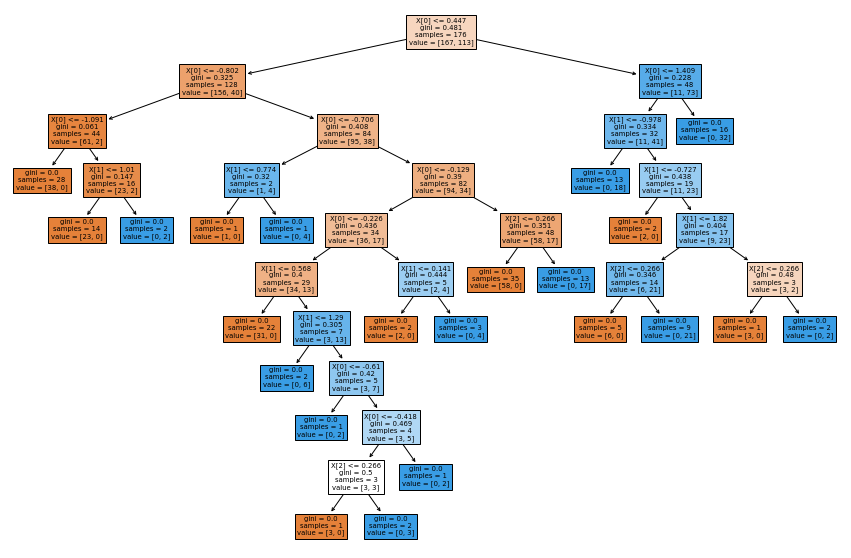

In [36]:
plt.figure(figsize=(15,10))
tree.plot_tree(rfc.estimators_[9], filled=True) 

In [37]:
rfc_100.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

[Text(0.5909090909090909, 0.9166666666666666, 'X[1] <= 0.583\ngini = 0.451\nsamples = 179\nvalue = [184, 96]'),
 Text(0.36363636363636365, 0.75, 'X[1] <= -0.58\ngini = 0.32\nsamples = 140\nvalue = [176, 44]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[0] <= 0.688\ngini = 0.425\nsamples = 56\nvalue = [61, 27]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [60, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[1] <= -1.419\ngini = 0.069\nsamples = 21\nvalue = [1, 27]'),
 Text(0.18181818181818182, 0.25, 'X[0] <= 1.072\ngini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 19\nvalue = [0, 25]'),
 Text(0.5454545454545454, 0.5833333333333334, 'X[2] <= 0.266\ngini = 0.224\nsamples = 84\nvalue = [115, 17]'),
 Text(0.4

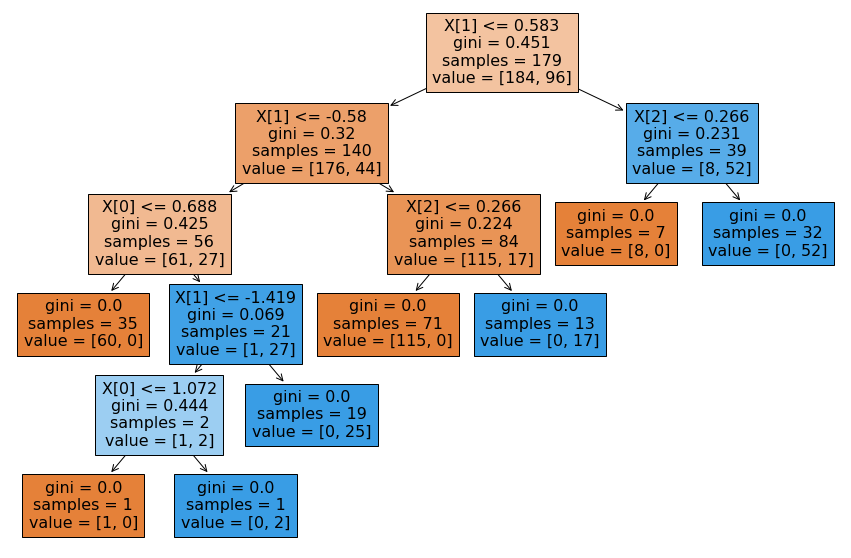

In [38]:
plt.figure(figsize=(15,10))
tree.plot_tree(rfc_100.estimators_[99], filled=True)

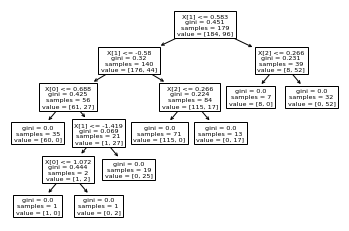

In [39]:
for i in range(len(rfc_100.estimators_)):
  tree.plot_tree(rfc_100.estimators_[i])

**Visualising the Test set results**

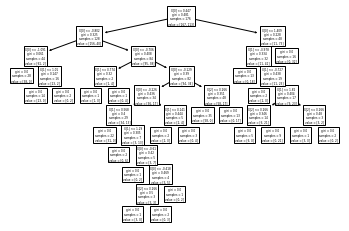

In [40]:
for i in range(len(rfc.estimators_)):
  tree.plot_tree(rfc.estimators_[i])